In [1]:
%pip install seaborn

In [2]:
%pip install scikit-learn

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [5]:
gold_data = pd.read_csv("gld_price_data.csv")

In [6]:
gold_data.head(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


In [7]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
gold_data.shape

(2290, 6)

In [9]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 98.5+ KB


In [10]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [12]:
corelation = gold_data.corr()

<ipython-input-12-37caeaca79f2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation = gold_data.corr()


<AxesSubplot:>

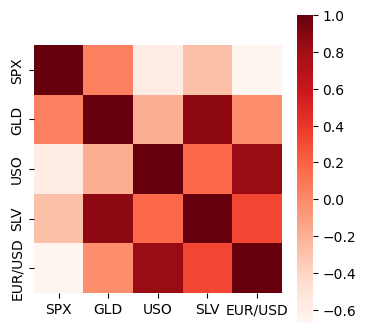

In [14]:
plt.figure(figsize = (4,4))
sns.heatmap(corelation, cbar=True, square=True,
            annot_kws={"size":8}, cmap='Reds'
            )

In [15]:
print(corelation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<AxesSubplot:xlabel='GLD', ylabel='Count'>

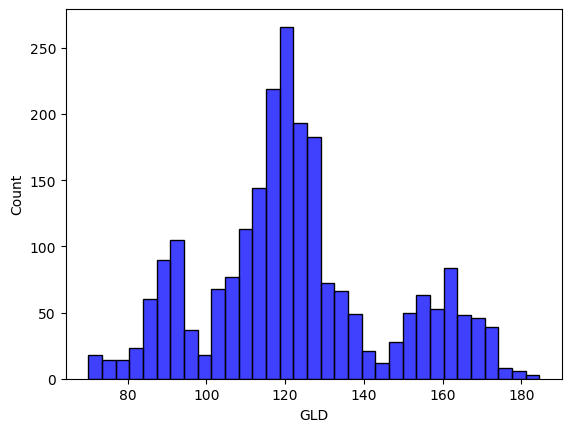

In [20]:
sns.histplot(gold_data['GLD'],color='blue')

In [21]:
X = gold_data.drop(['Date','GLD'],axis = 1)
Y = gold_data['GLD']

In [22]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [23]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [24]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [25]:
regressor = RandomForestRegressor(n_estimators=100)

In [26]:
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [27]:
test_data_pred =  regressor.predict(x_test)

In [28]:
print(test_data_pred)

[168.55919924  81.84500002 116.22020014 127.63700053 120.91440128
 154.7217979  150.39879879 126.03450043 117.70929861 125.92850089
 116.77230086 172.65170104 142.02419879 168.00059804 115.20159996
 117.64430064 137.66060348 169.89880044 158.9914027  160.0748009
 155.1088999  125.26090011 175.85540019 157.13350314 125.26610022
  93.68969975  77.83060022 120.69920032 119.14689969 167.50729979
  87.91080093 125.08010026  91.10410079 117.67400029 121.11769883
 135.79420188 115.75290146 115.6594007  147.57949985 107.35620103
 104.59360257  87.21279803 126.46820081 118.04399991 154.21719906
 119.69649951 108.33209982 107.95439803  93.17030025 127.05069785
  74.34720074 113.53429893 121.43790015 111.17529927 118.85119913
 121.04529941 158.8547013  166.63890104 147.05789686  85.8437987
  94.35930042  86.97819924  90.55480014 119.01850071 126.4810005
 127.6193003  169.3357991  122.21949936 117.20179936  98.55810023
 168.30140127 142.95519863 131.73770304 121.13220192 120.63479945
 119.82750051

In [29]:
error_score = metrics.r2_score(y_test, test_data_pred)
print("Error values:", error_score)

Error values: 0.9898381559356884


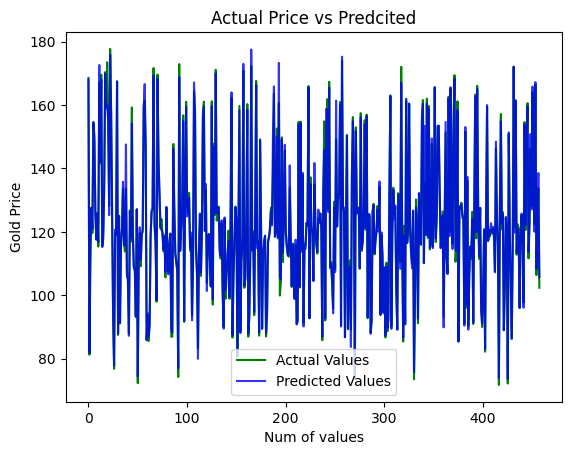

In [33]:
y_test = list(y_test)
plt.plot(y_test,color='green',label="Actual Values")
plt.plot(test_data_pred, color='blue', alpha=0.8, label='Predicted Values')
plt.title("Actual Price vs Predcited")
plt.xlabel("Num of values")
plt.ylabel("Gold Price")
plt.legend()
plt.show()

In [31]:
import sklearn
print(sklearn.__version__)

1.3.1


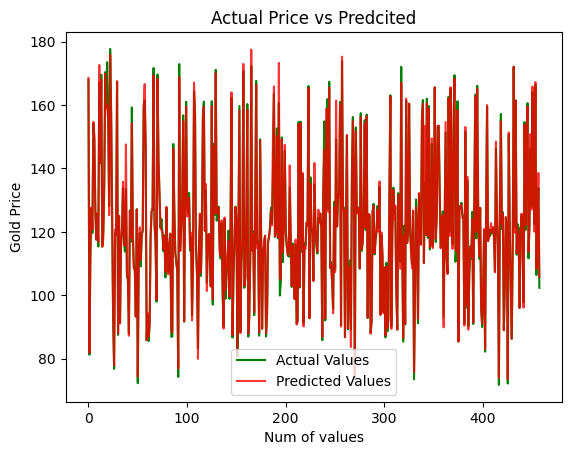

In [32]:
x_test = list(y_test)
plt.plot(y_test,color='green',label="Actual Values")
plt.plot(test_data_pred, color='red', alpha=0.8, label='Predicted Values')
plt.title("Actual Price vs Predcited")
plt.xlabel("Num of values")
plt.ylabel("Gold Price")
plt.legend()
plt.show()